# TuC Datenanalyse

In [1]:
# load data
%matplotlib inline
from IPython.display import display
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../data/order.tbl.short', sep='|')

In [48]:
# Overview
number_of_rows = len(data)
print('Number of lines: ', number_of_rows)
header = data.columns.tolist()
print('Header: ', ','.join(header))
print('First 3 rows:')
print(data[:3])

Number of lines:  9000000
Header:  ORDERKEY,CUSTKEY,ORDERSTATUS,TOTALPRICE,ORDERDATE,ORDERPRIORITY,CLERK,SHIPPRIORITY,COMMENT,Unnamed: 9
First 3 rows:
   ORDERKEY  CUSTKEY ORDERSTATUS  TOTALPRICE   ORDERDATE ORDERPRIORITY  \
0         1   468010           O   116666.88  1996-01-02         5-LOW   
1         2   468010           O    19444.48  1996-01-02         5-LOW   
2         3   468010           O   116666.88  1996-01-02      1-URGENT   

             CLERK  SHIPPRIORITY  \
0  Clerk#000005704             0   
1  Clerk#000005704             0   
2  Clerk#000005704             0   

                                             COMMENT  Unnamed: 9  
0  jSmgxOi157kxm gCwQzgNOmiO0MkhCR4N BLj6OQBkl34k...         NaN  
1  jP0BgO31m7Sw6LmC25k3RBw BmRkkjmzBCO4Qij67CN3mQ...         NaN  
2  xxSzlw2hwnM10PijiOz2gP02Qh3OQgm02ykNOwPxhl xRM...         NaN  


## Cardinalities

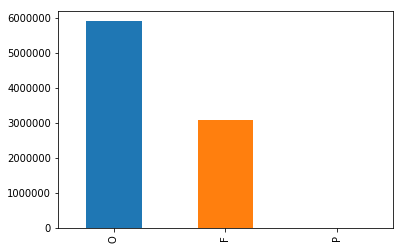

In [49]:
data['ORDERSTATUS'].value_counts().plot(kind='bar')

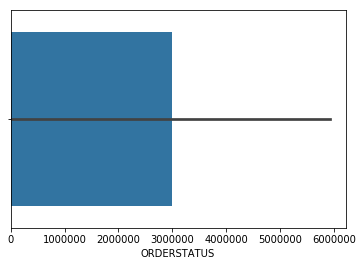

In [50]:
sns.barplot(data['ORDERSTATUS'].value_counts())

## Unique Values per Column

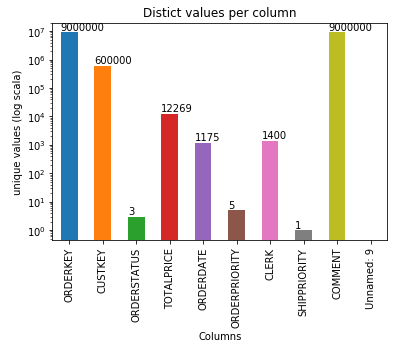

In [9]:
ax = data.apply(pd.Series.nunique).plot(kind='bar', logy=True, title='Distict values per column')
ax.set(xlabel="Columns", ylabel="unique values (log scala)")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.2))
    
    

## Null Values per Column

In [13]:
data.isnull().sum()

ORDERKEY               0
CUSTKEY                0
ORDERSTATUS            0
TOTALPRICE             0
ORDERDATE              0
ORDERPRIORITY          0
CLERK                  0
SHIPPRIORITY           0
COMMENT                0
Unnamed: 9       9000000
dtype: int64

In [15]:
data.dtypes

ORDERKEY           int64
CUSTKEY            int64
ORDERSTATUS       object
TOTALPRICE       float64
ORDERDATE         object
ORDERPRIORITY     object
CLERK             object
SHIPPRIORITY       int64
COMMENT           object
Unnamed: 9       float64
dtype: object

## Min & Max Values


In [19]:
print('Min Values:')
print(data.apply(pd.Series.min))
print('\n\nMax Values:')
print(data.apply(pd.Series.max))

Min Values:
ORDERKEY                                                   1
CUSTKEY                                                    1
ORDERSTATUS                                                F
TOTALPRICE                                           1023.79
ORDERDATE                                         1992-01-01
ORDERPRIORITY                                       1-URGENT
CLERK                                        Clerk#000000006
SHIPPRIORITY                                               0
COMMENT               1AhQw1lwMCgO72NSlQC3gmimCy4y2C6iR127A3
Unnamed: 9                                               NaN
dtype: object


Max Values:
ORDERKEY                       36000000
CUSTKEY                          899999
ORDERSTATUS                           P
TOTALPRICE                       700421
ORDERDATE                    1998-08-02
ORDERPRIORITY                     5-LOW
CLERK                   Clerk#000005995
SHIPPRIORITY                          0
COMMENT          zzzzzP2B6OPmj